In [1]:
import numpy as np
import cv2
import keras
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy as scc
from sklearn.model_selection import train_test_split
import glob
import pathlib

In [2]:
pic_path=pathlib.Path(r"C:\Users\arunf\Data Science\gender detection\Training")

In [3]:
male=list(pic_path.glob('male\*'))
female=list(pic_path.glob('female\*'))

In [4]:
pic_dict={'Male':male,'Female':female}

In [5]:
pic_class={'Male':0,'Female':1}

In [6]:
x=[]
y=[]

In [7]:
for i in pic_dict:
    pic_path_list=pic_dict[i]
    for path in pic_path_list:
        img=cv2.imread(str(path))
        img=cv2.resize(img,(75,75))
        img=img/255
        x.append(img)
        y.append(pic_class[i])

In [8]:
x=np.array(x)
y=np.array(y)

In [9]:
print(x.shape)
print(y.shape)

(47009, 75, 75, 3)
(47009,)


In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [20]:
model=Sequential()

model.add(Conv2D(filters=180,kernel_size=(3,3),input_shape=(75,75,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=120,kernel_size=(3,3),input_shape=(75,75,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
                    
model.add(Conv2D(filters=75,kernel_size=(3,3),input_shape=(75,75,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
          
model.add(Flatten())
model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 73, 73, 180)       5040      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 180)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 120)       194520    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 120)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 15, 15, 75)        81075     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 75)        

In [25]:
model.compile(optimizer='adam',loss=scc(),metrics=['accuracy'])

In [26]:
import tensorflow
callback = tensorflow.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

In [27]:
hist=model.fit(xtrain,ytrain,epochs=10,validation_data=(xtest,ytest),callbacks=[callback])

Epoch 1/10
1029/1029 [==============================] - 499s 483ms/step - loss: 0.3209 - accuracy: 0.8452 - val_loss: 0.1829 - val_accuracy: 0.9317
Epoch 2/10
1029/1029 [==============================] - 489s 475ms/step - loss: 0.1647 - accuracy: 0.9386 - val_loss: 0.1595 - val_accuracy: 0.9411
Epoch 3/10
1029/1029 [==============================] - 480s 466ms/step - loss: 0.1372 - accuracy: 0.9503 - val_loss: 0.1497 - val_accuracy: 0.9494
Epoch 4/10
1029/1029 [==============================] - 476s 462ms/step - loss: 0.1212 - accuracy: 0.9560 - val_loss: 0.1482 - val_accuracy: 0.9432
Epoch 5/10
1029/1029 [==============================] - 477s 463ms/step - loss: 0.1116 - accuracy: 0.9599 - val_loss: 0.1479 - val_accuracy: 0.9495
Epoch 6/10
1029/1029 [==============================] - 476s 463ms/step - loss: 0.1008 - accuracy: 0.9644 - val_loss: 0.1323 - val_accuracy: 0.9509
Epoch 7/10
1029/1029 [==============================] - 476s 463ms/step - loss: 0.0947 - accuracy: 0.9673 - val_

In [28]:
model.evaluate(xtest,ytest)

441/441 [==============================] - 42s 94ms/step - loss: 0.1323 - accuracy: 0.9509


[0.13234420120716095, 0.9509324431419373]

In [29]:
his=hist.history
his

{'loss': [0.3208923637866974,
  0.16470025479793549,
  0.13722877204418182,
  0.12121415883302689,
  0.11164213716983795,
  0.10080980509519577,
  0.09466749429702759,
  0.08603597432374954,
  0.07624971121549606,
  0.07087638229131699],
 'accuracy': [0.8451954126358032,
  0.9385522603988647,
  0.9503434300422668,
  0.9560262560844421,
  0.9598857164382935,
  0.9643834233283997,
  0.9673007726669312,
  0.9698535203933716,
  0.9728620648384094,
  0.9750805497169495],
 'val_loss': [0.1828898787498474,
  0.15951359272003174,
  0.1496746689081192,
  0.14819815754890442,
  0.1479264348745346,
  0.13234420120716095,
  0.20006397366523743,
  0.13335774838924408,
  0.17062509059906006,
  0.17780853807926178],
 'val_accuracy': [0.9317166805267334,
  0.9410763382911682,
  0.9494433999061584,
  0.9432035684585571,
  0.9495142698287964,
  0.9509324431419373,
  0.931858479976654,
  0.952846884727478,
  0.9475998282432556,
  0.9461107850074768]}

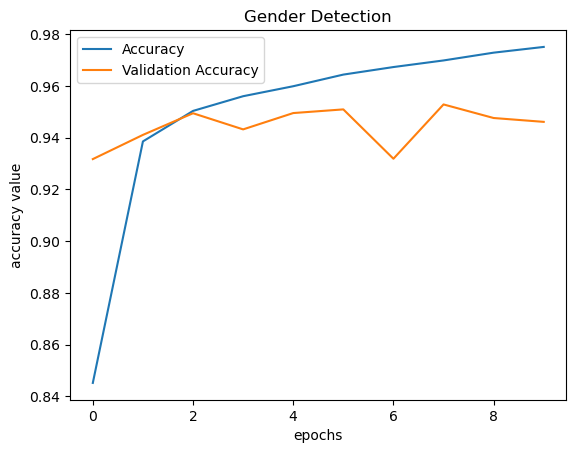

In [33]:
plt.plot(his['accuracy'],label='Accuracy')
plt.plot(his['val_accuracy'],label='Validation Accuracy')
plt.title("Gender Detection")
plt.xlabel('epochs')
plt.ylabel('accuracy value')
plt.legend()
plt.show()

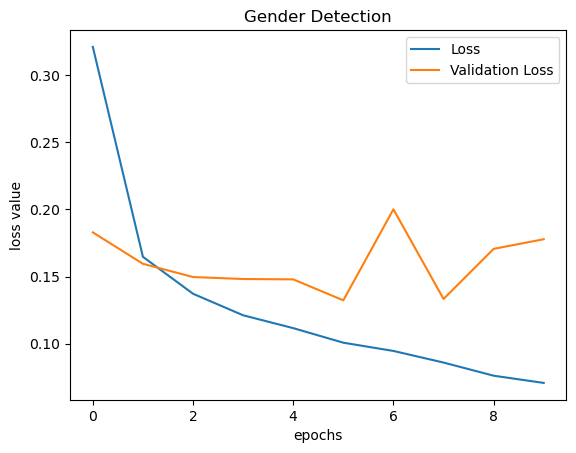

In [34]:
plt.plot(his['loss'],label='Loss')
plt.plot(his['val_loss'],label='Validation Loss')
plt.title("Gender Detection")
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend()
plt.show()

**PREDICTION**

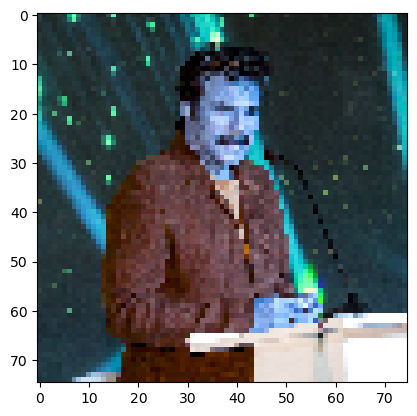

In [37]:
img=cv2.imread(r"C:\Users\arunf\Downloads\Mammootty2022.jpg")
img=cv2.resize(img,(75,75))
plt.imshow(img)

In [38]:
img.shape

(75, 75, 3)

In [39]:
img=img.reshape(1,75,75,3)

In [40]:
pred=model.predict(img)
pred

1/1 [==============================] - 0s 128ms/step


array([[1., 0.]], dtype=float32)

In [42]:
index=np.argmax(pred)
index

0

In [43]:
for k,v in pic_class.items():
    if v==index:
        print('prediction:', k)

prediction: Male


**MODEL SAVING**

In [45]:
model.save('gender.h5')

**GENDER DETECTION USING WEBCAM**

In [ ]:
import cv2
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
k_model=tf.keras.models.load_model('gender.h5')
haar_data=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [ ]:
cap=cv2.VideoCapture(0)

label_dict={0:'Male',1:'Female'}
color_dict={0:(0,255,0),1:(0,0,255)}

while True:
    flag,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=haar_data.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        face_img=img[y:y+w,x:x+w]
        resized_img=cv2.resize(face_img,(75,75))
        normalized=resized_img/255
        reshaped=np.reshape(normalized,(1,75,75,3))
        result=k_model.predict(reshaped)
        label=np.argmax(result,axis=1)[0]
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.putText(img,label_dict[label],(x,y-10),cv2.FONT_HERSHEY_COMPLEX,0.6,(23,255,230),2)
        cv2.imshow('LIVE',img)
        if cv2.waitKey(10)==27:
            break
    
cap.release()
cv2.destroyAllWindows()
    